In [1]:
from IPython.core.display import HTML as Center

Center(
""" 
<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style> 
""")

$
\newcommand{\nc}{\newcommand} 
\nc{\t}{\text}
\nc{\tb}{\textbf}
\nc{\ti}{\textit}
\nc{\x}{\boldsymbol{x}}
\nc{\y}{\boldsymbol{y}}
\nc{\z}{\boldsymbol{z}}
$

# $$\textbf{Python Programming for Machine Learning} $$ 

## $$\t{Randomness, Calculus}$$

#### $$\text{Winter Semester 2021/2022}$$

#### $$\text{Sergej Dogadov and Panagiotis Tomer Karagianis}$$

<center>
<img src='images/pyt.png' width=250>

## $$\textbf{Randomness}$$
<hr>
<br>
<center>
    <img src='./images/dice.png' width='500'>

In [2]:
#NumPy subpackage for random variables

from numpy import random as rnd 
import numpy as np

## $$\textbf{Sampling}$$
<hr>
<br>

* $\text{Draw random samples from a uniform distribution.}$

In [3]:
min_value = -1
max_value = 1

number_of_samples = 1000

U = rnd.uniform(min_value, max_value, size=number_of_samples) # uniform samples in range (min_value, max_value)

f"Mean: {U.mean():.3f} Variance: {U.var():.2f} Std: {U.std():.2f}"

'Mean: 0.014 Variance: 0.34 Std: 0.58'

* $\text{Visualize 1-dim samples.}$

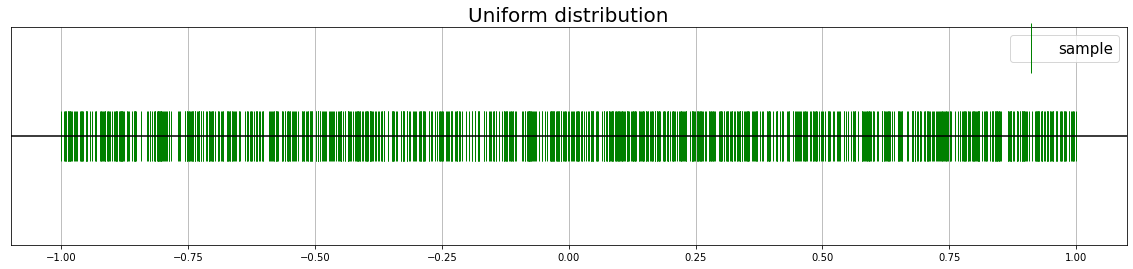

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.title('Uniform distribution', fontsize=20)

plt.plot(U, np.zeros_like(U), '|', c='g', ms=50, label='sample')

plt.axhline(y = 0, color='k')
plt.grid(axis='x')

plt.legend(fontsize=15)
plt.yticks([]);

## $$\textbf{ Represent samples using a histogram plot}$$
<hr>
<br>

(array([34., 39., 32., 28., 36., 27., 31., 32., 35., 34., 30., 27., 22.,
        37., 32., 32., 48., 42., 38., 36., 37., 26., 27., 29., 27., 34.,
        33., 36., 41., 38.]),
 array([-9.99520886e-01, -9.32885928e-01, -8.66250969e-01, -7.99616010e-01,
        -7.32981052e-01, -6.66346093e-01, -5.99711135e-01, -5.33076176e-01,
        -4.66441217e-01, -3.99806259e-01, -3.33171300e-01, -2.66536342e-01,
        -1.99901383e-01, -1.33266424e-01, -6.66314658e-02,  3.49279787e-06,
         6.66384514e-02,  1.33273410e-01,  1.99908369e-01,  2.66543327e-01,
         3.33178286e-01,  3.99813244e-01,  4.66448203e-01,  5.33083162e-01,
         5.99718120e-01,  6.66353079e-01,  7.32988037e-01,  7.99622996e-01,
         8.66257955e-01,  9.32892913e-01,  9.99527872e-01]))

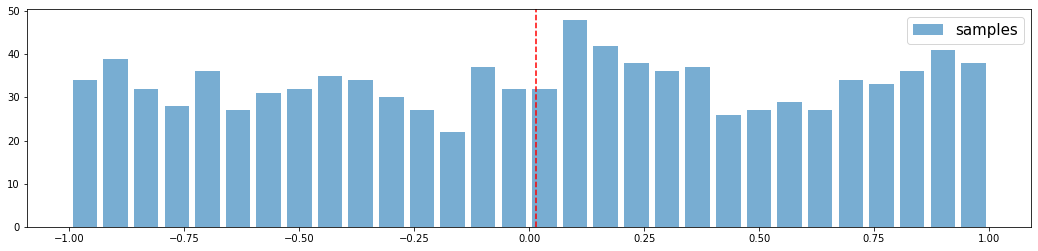

In [5]:
plt.figure(figsize=(18, 4))

# num of bins, block width percentage
nums, borders, _ = plt.hist(U, bins=30, rwidth=0.8, alpha=0.6, label='samples', density=False) 

plt.axvline(x=U.mean(), ls='--', c='r') # plot dashed mean line
plt.legend(fontsize=15);

nums, borders


In [6]:
def calc_area(nums, borders):
    vals = borders[1:] - borders[:-1]
    area = np.sum(vals * nums)
    return area

calc_area(nums, borders) # enable density to get 1

66.63495859279278

## $$\textbf{Univariate-normal (Gaussian) distribution}$$
<hr>
<br>

In [7]:
# fix the random seed for debuging
rnd.seed(2334)  # any value

In [8]:
def sample_normal(mean, std, n_samples=1000, seed=None):
    
    if seed is not None:
        rnd.seed(seed)
        
    X = rnd.normal(loc=mean, scale=std, size=n_samples)
    print(f'Mean: {X.mean():.3f} Variance: {X.var():.2f} Std: {X.std():.2f}')
    
    return X

In [9]:
mean = 2
std = 8

X = sample_normal(mean, std, seed=44)

Mean: 1.932 Variance: 64.33 Std: 8.02


## $$\textbf{ Gaussian distribution plot}$$
<hr>
<br>

Mean: 2.155 Variance: 61.31 Std: 7.83


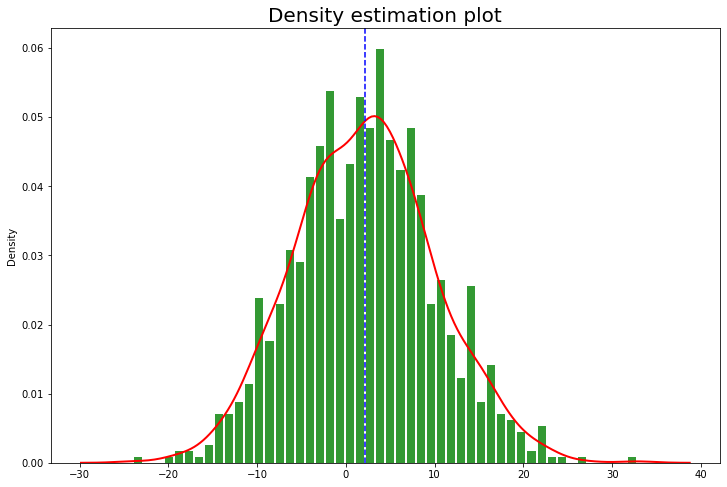

In [10]:
X = sample_normal(mean, std, n_samples=1000, seed=42)

plt.figure(figsize=(12,8))

nums, borders, _ = plt.hist(X, bins=50, density=True, alpha=0.8, rwidth=0.8, color='g')
assert np.isclose(calc_area(nums, borders), 1)

from seaborn import kdeplot

kdeplot(X,linewidth=2, color='r') #
plt.title('Density estimation plot', fontsize=20)
plt.axvline(X.mean(), ls='--', c='b');

## $$\textbf{Multiple Gaussian distribution}$$
<hr>
<br>

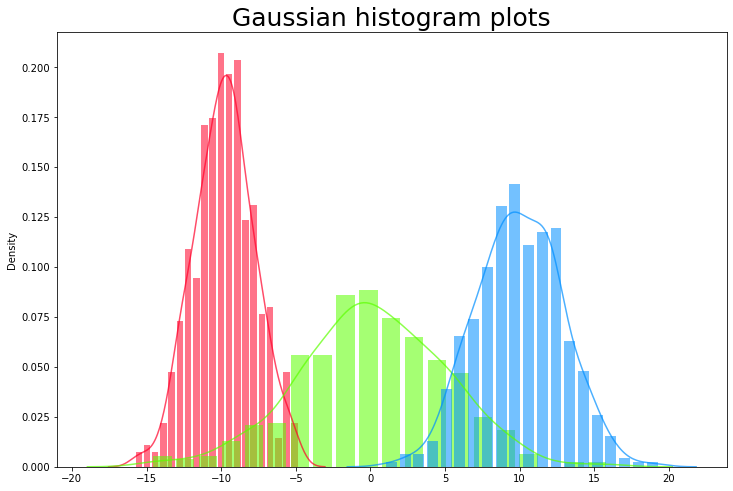

In [11]:
means = [-10, 0, 10]
stds = [2, 5, 3]

assert len(means) == len(stds)

n_clusters = len(means)

fig = plt.figure(figsize=(12,8))

from matplotlib import cm
cmap = cm.get_cmap('gist_rainbow')
rgba_values = cmap(np.arange(n_clusters) / n_clusters) # red, green, blue, alpha

for n in range(n_clusters): # given additionaly a counter back
    
    data = rnd.normal(means[n], stds[n], size=500)
    
    color = rgba_values[n]
    
    plt.hist(data, bins=20, color=color, alpha=0.55, rwidth=0.8, density=True)
    kdeplot(data, color=color, alpha=0.7)
    
plt.title('Gaussian histogram plots', fontsize=25);   

### $$\textbf{Gaussian histogram plot with subplots}$$
<hr>

In [12]:
def plot_gaussians(means, stds, size=250, bins=25):
    
    N = len(means)
    M = len(stds)
    
    fig, axis = plt.subplots(nrows=N, ncols=M, sharey=True, sharex=True, figsize=(22, 16))

    R,C = axis.shape

    for r in range(R):
        for c in range(C):
            
            ax = axis[r,c]
            
            data = rnd.normal(means[r], stds[c], size=size)
            
            ax.hist(data, bins=bins, rwidth=0.8, density=True, color='g', alpha=0.5, label='data')
            ax.axvline(data.mean(), ls='--', c='r', ymax=.8, label='$\\mu =$'+f'{data.mean():0.2f} std: {data.std():0.2f}')
            
            ax.set_xticks(means) # plt.xticks([...])
            ax.legend(fontsize=15)
            ax.grid(axis='y')
            
            kdeplot(data, ax=ax, color='k')
            
    fig.suptitle('Gaussian histogram plots', fontsize=25)

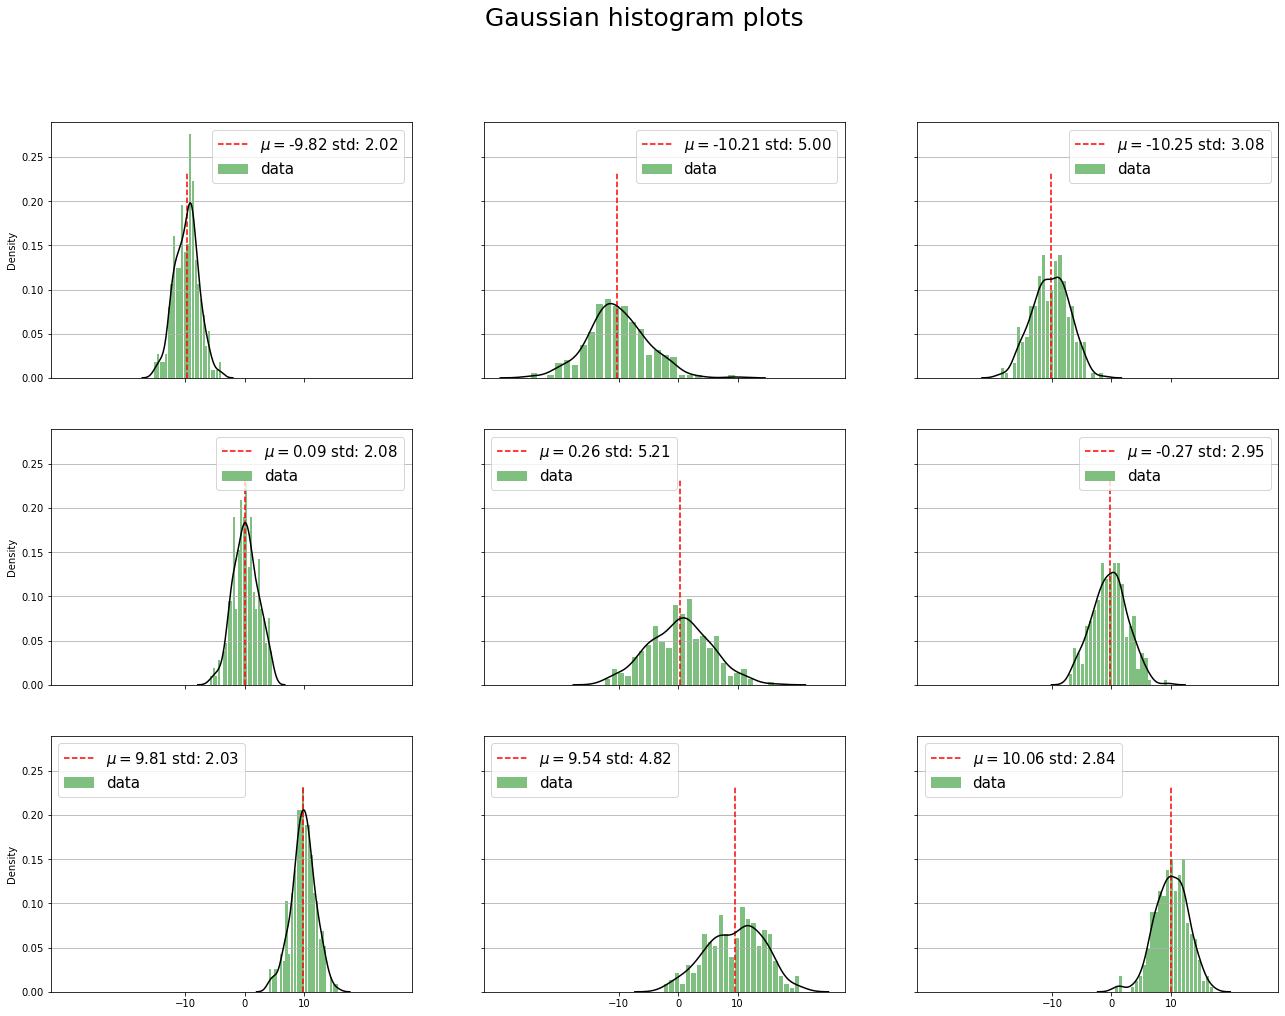

In [13]:
plot_gaussians(means, stds)

## $$\textbf{Probability density function}$$
<hr>
<br>

* $\text{Gaussian PDF}$

$$\boxed{\small{\mathcal{N}(x | \mu, \sigma)} = 
\frac{1}{\sigma\sqrt{2\pi}}\exp{\Big(-\frac{(x - \mu)^2}{2\sigma^2}\Big)}}$$

In [14]:
def gauss_pdf(X, mu=0, sigma=1):
    #                                           (N,d) - (1,d) = (N,d)
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(X - mu)**2/(2*sigma**2))

In [15]:
mean = 2
std = 4

X = np.linspace(start=-15, stop=17, num=100)
print(X[::10])

g_pdf = gauss_pdf(X, mean, std)

[-15.         -11.76767677  -8.53535354  -5.3030303   -2.07070707
   1.16161616   4.39393939   7.62626263  10.85858586  14.09090909]


In [16]:
from scipy.stats import norm

n_pdf = norm.pdf(X, loc=mean, scale=std)

assert np.allclose(g_pdf, n_pdf), 'The pdf values are not the same'

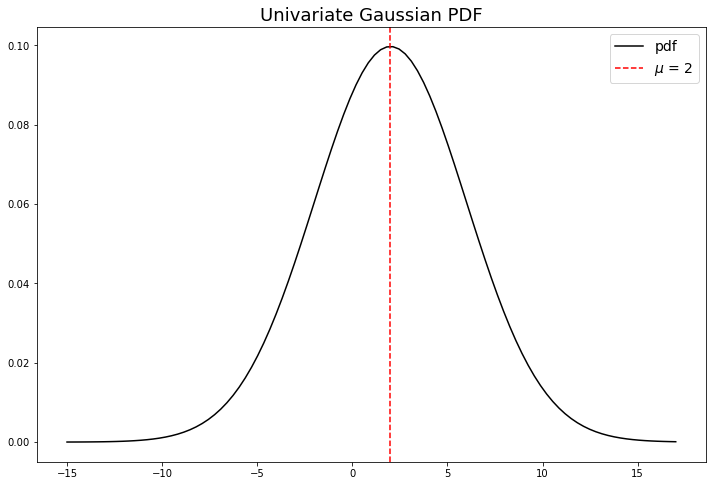

In [17]:
fig = plt.figure(figsize=(12,8))
plt.title('Univariate Gaussian PDF', fontsize=18)

plt.plot(X, g_pdf, color='k', label='pdf')
plt.axvline(mean, color='r', linestyle='--', label=f'$\mu$ = {mean}')
plt.legend(fontsize=14);

## $$\textbf{Multivariate Gaussian distribution}$$
<hr>

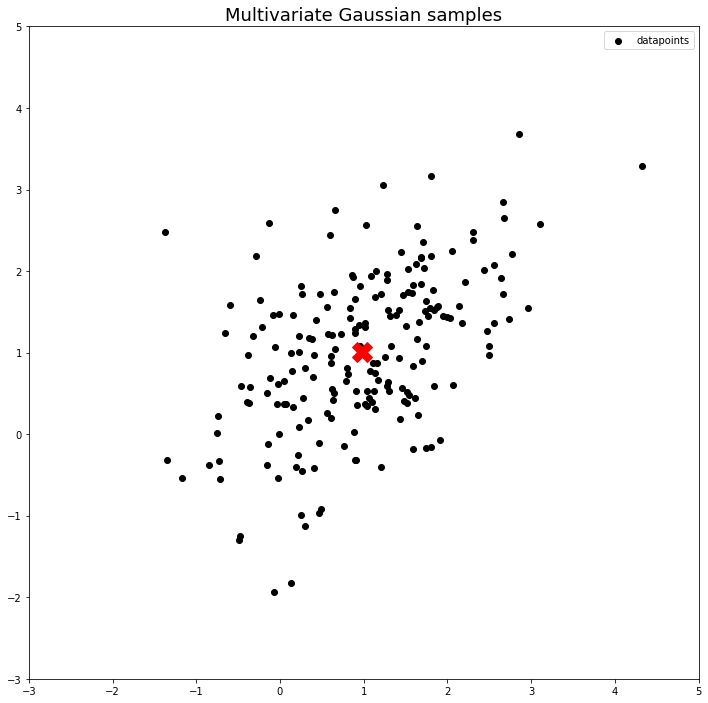

In [18]:
from scipy.stats import multivariate_normal

mu = np.ones(2) # [1, 1]
Sigma =  np.array([[1, 0.5],[0.5, 1]])# , np.eye(d) 

xmin, xmax, ymin, ymax = [-3, 5, -3, 5]

X = multivariate_normal.rvs(mean=mu, cov=Sigma, size=200, random_state=42)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title('Multivariate Gaussian samples', fontsize=18)
ax.scatter(*X.T, color='k', label='datapoints')
ax.plot(*X.mean(0), 'X', color='r', ms=20)
ax.legend(loc='best');

## $$\textbf{Multivariate Gaussian density plot}$$
<hr>

(800, 800) (800, 800)
(800, 800, 2)


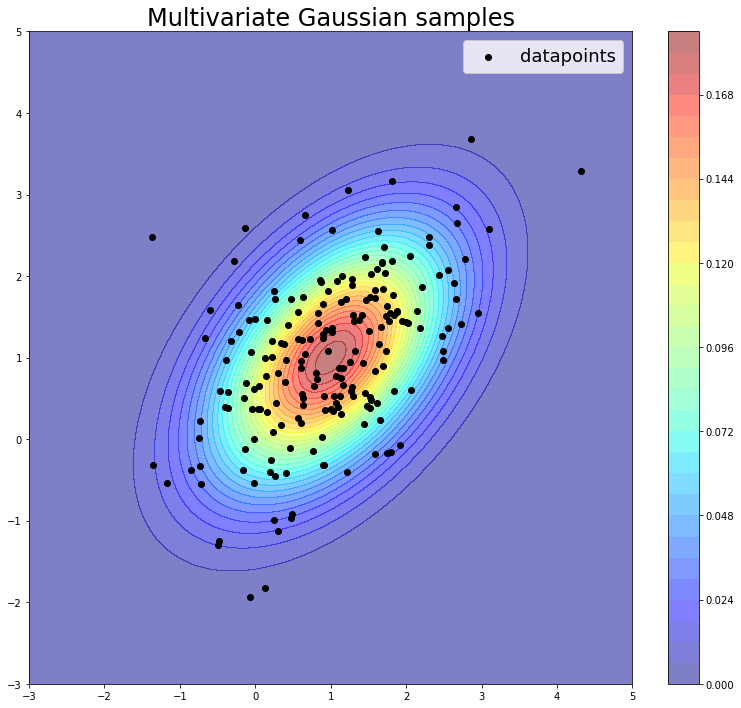

In [19]:
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
print(x.shape, y.shape)

xy = np.dstack((x, y))
print(xy.shape)

z = multivariate_normal(mu, Sigma).pdf(xy) # calc MVG pdf values

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cntr = ax.contourf(x, y, z, cmap='jet', alpha=0.5, levels=30)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)

fig.colorbar(cntr, cax=cax, orientation='vertical')
ax.set_title('Multivariate Gaussian samples', fontsize=24)
ax.scatter(*X.T, color='k', label='datapoints')
ax.legend(loc='best', fontsize=18);

## $$\textbf{Multinomial distribution}$$
<hr>

* $\text{Let's draw some random samples from a multinomial distribution. We'll use our fruits from the first lecture.}$
<br>
<br>
<center>
    <img src='./images/fruits.png', width='1100'>

In [20]:
fruits = np.array([
    'watermelon',
    'apple',
    'grape',
    'grapefruit',
    'lemon',
    'banana',
    'cherry'
])

## $$\textbf{Sample from multinomial}$$
<hr>

In [21]:
n = 10 # number of samples

p = np.ones(len(fruits))/len(fruits) # represents equal sampling probability

print(p)

all_fruits = np.tile(fruits, (n,1)) # repeat multiple (5) times to represent all possible picks
#print(all_fruits)
print(all_fruits)

print(50 * '--')

mlt = rnd.multinomial(5, p, size=(n)) # draw multinomial samples 5 times with the given probability
#print(mlt)

mlt = mlt.astype(bool)
print(mlt)

samples = all_fruits[mlt] # select drown samples from all fruits

mlt.mean(axis=0)


[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']]
----------------------------------------------------------------------------------------------------
[[False  True  True False False  True  True]
 [ True False  True False  True False  True]
 [ True False  Tru

array([0.6, 0.6, 0.6, 0.4, 0.6, 0.5, 0.8])

In [22]:
list(samples)

['apple',
 'grape',
 'banana',
 'cherry',
 'watermelon',
 'grape',
 'lemon',
 'cherry',
 'watermelon',
 'grape',
 'lemon',
 'banana',
 'apple',
 'grape',
 'cherry',
 'watermelon',
 'apple',
 'grapefruit',
 'lemon',
 'banana',
 'watermelon',
 'apple',
 'lemon',
 'cherry',
 'watermelon',
 'apple',
 'grape',
 'grapefruit',
 'cherry',
 'watermelon',
 'apple',
 'grapefruit',
 'lemon',
 'cherry',
 'grape',
 'banana',
 'cherry',
 'grapefruit',
 'lemon',
 'banana',
 'cherry']

## $$\textbf{Adjust selection probabilities}$$
<hr>

In [23]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities to pick a fruit

n = 1000

all_fruits = np.tile(fruits, (n,1))

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with given probabilities
print(mlt) # mask as 0 or 1 ints

samples = all_fruits[mlt.astype(bool)] # show drown samples
#print(list(samples))

mlt.mean(axis=0)

[[0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


array([0.036, 0.73 , 0.034, 0.045, 0.05 , 0.059, 0.046])

## $$\textbf{ Another way to make discrete choices}$$
<hr>

<center>
    <img src='./images/sampling.png', width='900'>

In [24]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]

temp = [0] + p[:-1]
print(temp)

# Cumulate them
l = np.cumsum(temp) # lower-bounds
h = np.cumsum(p)    # upper-bounds

print(l)
print(h)


# Draw uniformly a number between 0 and 1
u = np.random.uniform(0, 1)

# Find which bin it belongs to
s = np.logical_and(u >= l, u < h) 

print(s) # sampled bin as a mask
# retrieve the label

fruits[np.argmax(s)]


[0, 0.05, 0.7, 0.05, 0.05, 0.05, 0.05]
[0.   0.05 0.75 0.8  0.85 0.9  0.95]
[0.05 0.75 0.8  0.85 0.9  0.95 1.  ]
[False  True False False False False False]


'apple'

# $$\textbf{ Optimization}$$
<hr>
<br>
<br>

<center>
    <img src='./images/optim.png' width='700'>

# $$\textbf{ Automatic differentiation with JAX}$$
<hr> 

<center>
    <img src='./images/JAX.png' width='400'>

In [25]:
#conda install -c conda-forge jax

import jax.numpy as np 
from jax import grad


ModuleNotFoundError: No module named 'jax'

## $$\textbf{ Taking univariate function derivatives}$$
<hr> 


$$y = 3 x^2 + 2, \quad y^{'}_{x} = 6x, \quad y^{''}_{x} = 6$$

In [ ]:
# define a function to numerically comp a gradient for
import jax.numpy as np

def y(x):
    return 3 * np.square(x) + 2 # note that you are using jax numpy

# grad comp at the point
x0 = 10.   # has to be float no diff possible on integers

# first derivative
print(grad(y)(x0)) # evaluated at point x

# second
print(grad(grad(y))(x0))


## $$\textbf{ Multivariate function derivatives}$$
<hr> 
<br>
<center>
$y = 3 x_1^3 + 2^{x_2}, \quad \frac{\partial y}{\partial x_1} = 9 x_1^2  \quad  \frac{ \partial y}{\partial x_2} = 2^{x_2} \ln{2}$

In [ ]:
x1 = 2. # has to be a float number
x2 = 3. # has to be a float number

y = lambda x1, x2 : 3 * np.power(x1, 3) + np.power(2, x2) # note you are using jax numpy


In [ ]:
# wrt x_1 (first func arg)
val = grad(y, 0)(x1,x2) # 9 * 2**2 = 36

test_val = 9*x1**2
print(f'{val} == {test_val}')

assert np.isclose(val,test_val)

In [ ]:
# wrt x_2
val = grad(y, 1)(x1, x2) # 2**(3)*ln(2)

test_val = 2**x2 * np.log(2)
print(f'{val} == {test_val}')

assert np.isclose(val, test_val, atol=1e-3) # 0.001 10**-3

* $\text{For more info about}\>$ <a href='https://jax.readthedocs.io/en/latest/notebooks/quickstart.html'>JAX</a>



## $$\textbf{ Gradient descent for finding minimum of a function}$$
<hr> 
<br>
$$y = kx^2 + const, \quad k=3$$

In [ ]:
# a function to find a minimum numerically
import jax.numpy as np 

f = lambda x, coeff=3, offset=0: coeff * np.power(x, 2) + offset # jax numpy !

def minimize_(fn, x0, step_size, max_it): 

    vals = np.array([x0]).astype(np.float32) # list of the checked points

    for _ in range(max_it):
        
        grad_f = grad(fn)
        
        curr_val = vals[-1]
        if abs(grad_f(curr_val)) > 1e-2: # the derivative approx not zero
            
            next_val = curr_val - step_size*grad_f(curr_val)
            vals = np.append(vals, next_val)
            
        else:
            return vals
            
    return vals

In [ ]:
vals = minimize_(f, x0=-5., step_size=0.01, max_it=10)
vals

## $$\textbf{ Plot the optimization steps}$$
<hr> 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_minimize(x, f, max_it=10, step_size=0.01):
    
    plt.figure(figsize=(10, 8))      
    plt.plot(x, f(x), label='$f(x)$')
    
    vals = minimize_(f, x0=x[0], step_size=step_size, max_it=max_it)
    
    plt.plot(vals, f(vals), "o--", c="r", label='opt step')  
    plt.legend(loc='best', fontsize=20)
    plt.grid()

In [ ]:
x = np.arange(-5, 5.01, 0.25) # function range
plot_minimize(x, f, max_it=10, step_size=1e-1)


## $$\textbf{SciPy minimize function}$$
<hr> 

<center>
    <img src='./images/scipy.png' width='300'>

In [ ]:
# Non continous function
f = lambda x, coeff=3, power=2: coeff * np.divide(coeff, x) + x ** power

x = np.arange(-5, 5.01, 0.25)
plt.plot(x, f(x))
plt.show()

## $$\textbf{Optimize non continuous functions}$$
<hr> 

In [ ]:
#conda install -c anaconda scipy

from scipy.optimize import minimize
import numpy as np

# use constrained optimization with bounds
min_x, max_x = (0.01, np.inf)

res = minimize(f, 5, args=(3, 2), method='L-BFGS-B', bounds=((min_x, max_x),) ) 
# result dict object
res

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(x, f(x))
plt.axvline(res['x'], linestyle='--', c='r')
plt.show()

# $$\textbf{Numerical integration with SciPy}$$
<hr> 


In [ ]:
f = lambda x, mu, sigma : np.exp(-0.5*(x-mu)**2/sigma**2)

mu = 1; sigma = 2;
args = (mu, sigma)

x = np.arange(-10, 12, 0.1)

def plot_(x, f, args, I=1):
    plt.figure(figsize=(8, 6))
    plt.plot(x, f(x, *args)/I)
    plt.show()

In [ ]:
plot_(x, f, args)

$$\Large{
I = \int_a^b f(x)\ dx
}$$

In [ ]:
from scipy.integrate import quad as integral

a = -10; b = 12;
I, err = integral(f, a, b, args)

print(f'An estimate of the absolute error in the result: {err}')
I

In [ ]:
plot_(x, f, args, I)

## $$\textbf{Thank you for your attention.}$$